### Time Series Forecasting

#### Importing libraries, dataset and pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# dataset downloaded from Github page of jbrownlee
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [3]:
type(df)

pandas.core.frame.DataFrame

In [14]:
# converting df to series (csv to time series)
# month into index for better data manipulation and series instead of dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv', index_col=[0], parse_dates=True, squeeze=True)
df.head()

Month
1-01    266.0
1-02    145.9
1-03    183.1
1-04    119.3
1-05    180.3
Name: Sales, dtype: float64

In [5]:
type(df)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

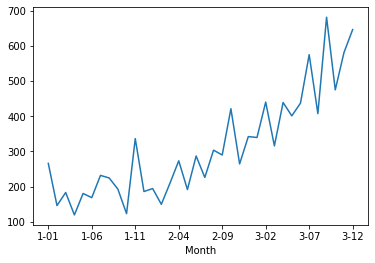

In [6]:
df.plot()

<AxesSubplot:xlabel='Month'>

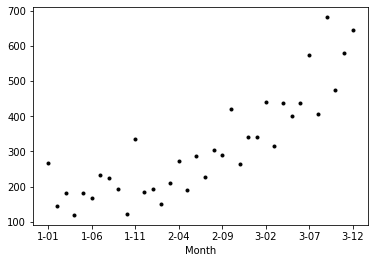

In [7]:
df.plot(style= '.k')

In [8]:
df.shape

(36,)

In [9]:
df.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month'>

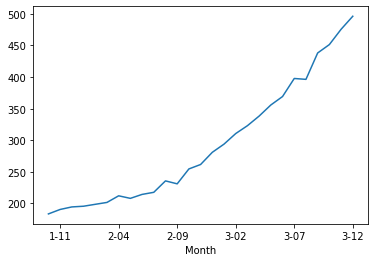

In [10]:
# smoothing the time series dataset (can be done by calculating the moving average)
# lets take 10 take moving average (mainly used in stock market analysis)
df_ma = df.rolling(window=10).mean()
df_ma.plot()

#### BaseLine model (Naive model)
It assumes that the previous values are related to the current values. In our case, the value of last day is going to reflect also the value of current day with some more variation.

In [11]:
# using shift method to create new forecast values 
df_base = pd.concat([df, df.shift(1)], axis=1)
df_base.head()

,Sales,Sales
Month,,
1-01,266.0,NaN
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3


In [12]:
# renaming the column names and removing the NaN values
df_base.columns = ['Actual_Sales', 'Forecase_Sales']
df_base.dropna(inplace=True)
print(df_base.shape)
df_base.head()

(35, 2)


,Actual_Sales,Forecase_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3


In [13]:
# calculate the error based on the data we create above
df_error = mean_squared_error(df_base.Actual_Sales, df_base.Forecase_Sales)
df_error = np.sqrt(df_error)
df_error

108.23764726616282

This is the error from the baseline model, lets use ARIMA model to check if we can get better results than this baseline model.

#### Auto Regressive Integrated Moving Average (ARIMA) model
- ARIMA(p,d,q) -> ARIMA takes 3 parameters
    - p -> p is Auto Regressive (p,0,0) becomes Auto Regressive model.
    - q -> q is Moving Average  (0,0,q) becomes Moving Average model.
    - So, by just playing around the p,d,q values we can create different models. But here, lets go with ARIMA model as a whole.